In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("tips.csv")
yedek = data.copy()

In [3]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
strList=["sex","smoker","day","time"] #kategorik 
intList=["total_bill","tip","size"] #norminal

In [6]:
data  = pd.get_dummies(data,strList)
data.head() 

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score 
from sklearn.neighbors import KNeighborsRegressor 

In [8]:
y = data.pop("tip") 
x = data 

In [9]:
trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)

In [10]:
knn_model=KNeighborsRegressor()
knn_model

KNeighborsRegressor()

In [11]:
model=knn_model._fit(trainX,trainY)

In [12]:
pred=model.predict(testX) #taahmin etme
pred

array([2.75 , 2.564, 3.646, 3.35 , 2.354, 2.246, 3.02 , 1.566, 2.866,
       2.702, 2.834, 1.888, 1.978, 1.722, 2.652, 3.582, 4.71 , 1.978,
       1.868, 2.218, 1.448, 2.212, 2.338, 2.824, 4.14 , 3.506, 1.872,
       4.662, 3.218, 2.966, 3.17 , 1.878, 1.704, 1.636, 4.67 , 3.918,
       3.634, 1.792, 2.464, 3.512, 3.438, 2.83 , 4.25 , 4.542, 2.15 ,
       3.592, 1.978, 3.592, 2.006])

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
np.sqrt(mean_squared_error(testY,pred)) #TEST HATASINI BULMA

1.1308555186590517

In [15]:
np.sqrt(mean_squared_error(trainY,model.predict(trainX)))#eğitim hataası

0.9129989917707242

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from mlxtend.feature_selection import SequentialFeatureSelector as SF
from mlxtend.plotting import plot_sequential_feature_selection as pltS

In [37]:
yedek2=yedek.copy()
yedek.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
strList=["sex","smoker","day","time"] #kategorik 
intList=["total_bill","tip","size"] #norminal
yedek2  = pd.get_dummies(yedek2,strList)
yedek2.head() 

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0


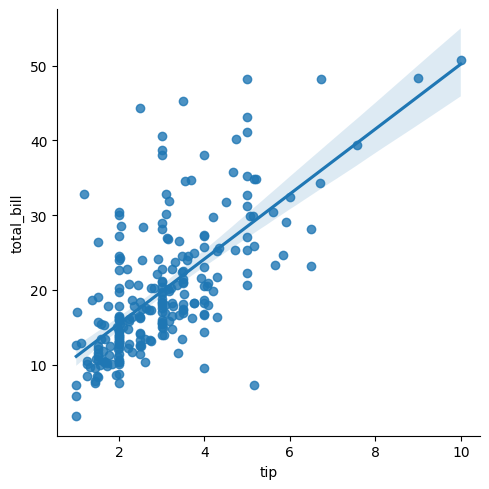

In [41]:
sns.lmplot(x='tip', y='total_bill', data=yedek2)

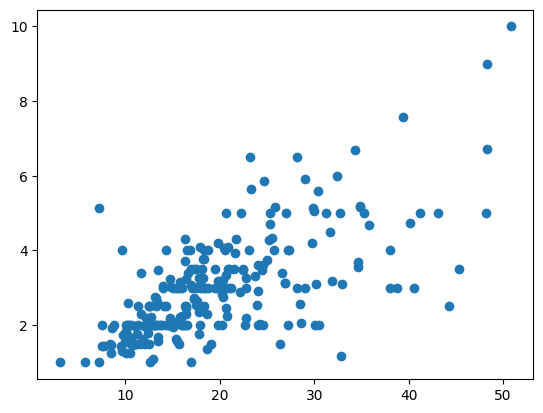

In [18]:
plt.scatter(yedek['total_bill'],yedek['tip'])  #tahmin ile gerçek veri karşılaştırılacak
plt.show()

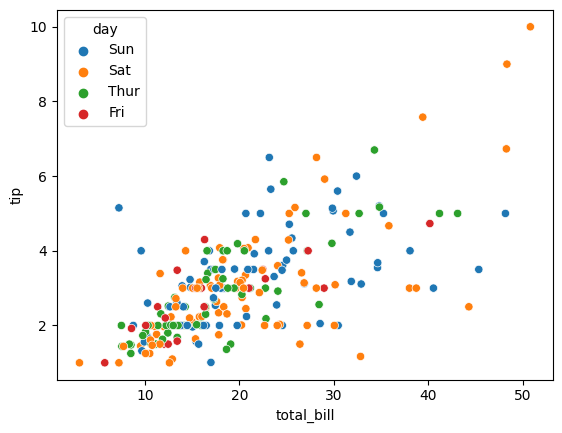

In [59]:
sns.scatterplot(x='total_bill',y='tip',data=yedek,hue='day')
plt.show()

<AxesSubplot:>

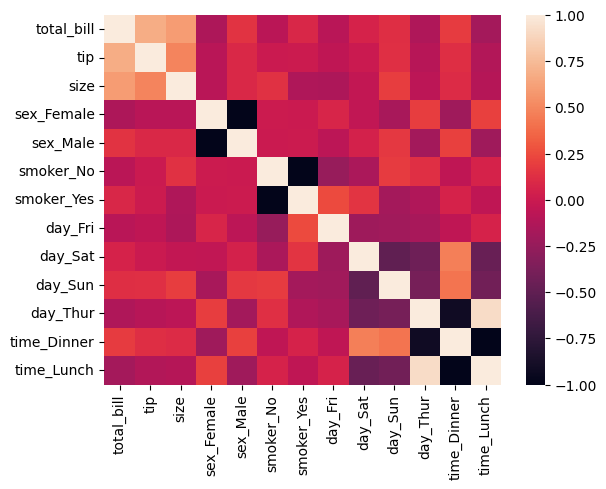

In [51]:
sns.heatmap(yedek2.corr())

<BarContainer object of 244 artists>

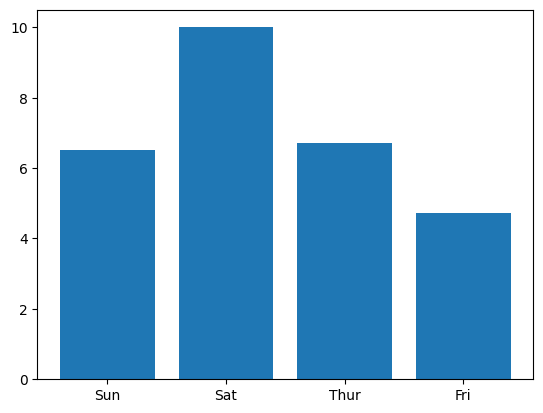

In [56]:
plt.bar(yedek['day'],yedek['tip'])

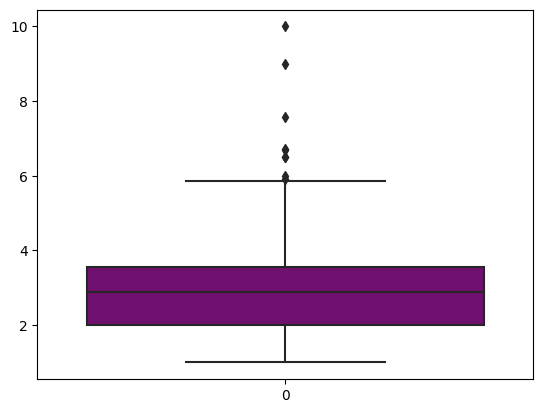

In [58]:
sns.boxplot(yedek2.tip,color='Purple')
plt.show()

LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()
lr.fit(trainX,trainY)
predictY = lr.predict(testX)

In [22]:
predictY[0:10]

array([2.84738392, 2.37954824, 4.25453267, 3.24586739, 2.75626668,
       2.29299157, 2.64393203, 1.81001985, 2.88327469, 2.62760039])